# **TP2 K Plus Proches Voisins**

# 1 KNN pour la classification

### Tâche 1 : Analyse des données

In [162]:
import pandas as pd

In [163]:
# Charger le fichier
df = pd.read_csv('diabetes.csv')

# 1. Dimensions du DataFrame
print("Dimensions du DataFrame :", df.shape)

# 2. Résumé des données
print("\nRésumé des données :")
df.info()

# 3. Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# 4. Distribution des classes
print("\nDistribution des classes :")
print(df['Outcome'].value_counts())

# 5. Nombre de caractéristiques descriptives
print("\nNombre de caractéristiques descriptives et leurs types :")
print(df.dtypes)

Dimensions du DataFrame : (767, 7)

Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   767 non-null    int64  
 1   BloodPressure             767 non-null    int64  
 2   Insulin                   767 non-null    int64  
 3   BMI                       767 non-null    float64
 4   DiabetesPedigreeFunction  767 non-null    float64
 5   Age                       767 non-null    int64  
 6   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB

Statistiques descriptives :
          Glucose  BloodPressure     Insulin         BMI  \
count  767.000000     767.000000  767.000000  767.000000   
mean   120.930900      69.104302   79.903520   31.994654   
std     31.977581      19.368410  115.283105    7.889095   
min      0.000000       

### Interprétation des résultats

###### Combien de classes sont présentes dans la base de données ?
    La colonne Outcome représente les classes :
    -> 0 pour les personnes non diabétiques.
    -> 1 pour les personnes diabétiques.
    Il y a 2 classes distinctes dans la base de données.

###### Combien de caractéristiques descriptives et de quels types ?
    Le DataFrame contient 7 colonnes, dont 6 colonnes sont des caractéristiques descriptives utilisées pour prédire le Outcome (la classe cible).

###### Combien d’exemples dans la base de données ? Et par classe ?
    -> Le DataFrame contient 767 exemples au total.
    -> Distribution par classe :
       - 499 exemples pour la classe 0 (non diabétique).
       - 268 exemples pour la classe 1 (diabétique).

### Tâche 2 : Préparation des données

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
# Séparer les caractéristiques (X) et la classe cible (y)
X = df.drop('Outcome', axis=1)  # Toutes les colonnes sauf Outcome
y = df['Outcome']  # Colonne Outcome

In [166]:
# Découpage des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42, stratify=y
)
#La répartition des classes doit rester similaire dans les deux ensembles grâce à stratify=y.

In [167]:
print("Taille de train data :", X_train.shape[0])
print("Taille de test data :", X_test.shape[0])

# Vérification des proportions des classes
print("Distribution des classes dans l'ensemble d'apprentissage :")
print(y_train.value_counts(normalize=True))
print("\nDistribution des classes dans l'ensemble de test :")
print(y_test.value_counts(normalize=True))

Taille de train data : 511
Taille de test data : 256
Distribution des classes dans l'ensemble d'apprentissage :
Outcome
0    0.649706
1    0.350294
Name: proportion, dtype: float64

Distribution des classes dans l'ensemble de test :
Outcome
0    0.652344
1    0.347656
Name: proportion, dtype: float64


### Tâche 3 : Apprentissage et validation du modèle

In [168]:
# Importation des bibliothèques nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# Création et entraînement du modèle KNN

# Créer le modèle avec n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
# Évaluation des performances

# Précision sur l'ensemble d'apprentissage
train_score = knn.score(X_train, y_train)

# Précision sur l'ensemble de test
test_score = knn.score(X_test, y_test)

# Afficher les scores
print(f"Model (k=1): [train: {train_score:.2f}, test: {test_score:.2f}]")

Model (k=1): [train: 1.00, test: 0.69]



Matrice de confusion :
[[125  42]
 [ 38  51]]


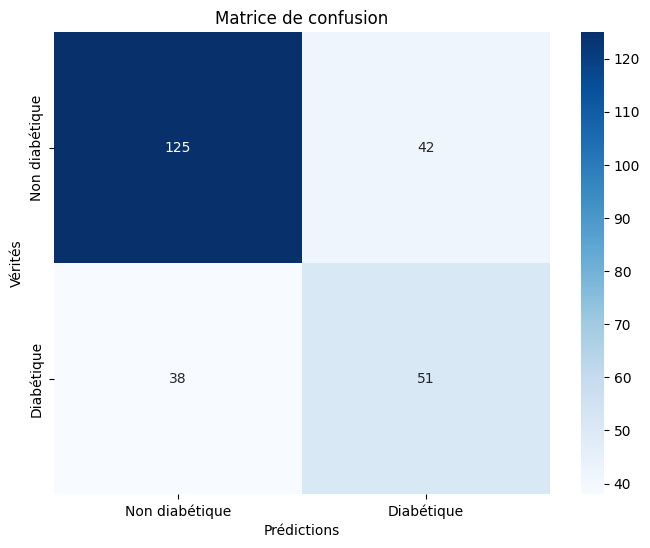

In [171]:
# Calcul de la matrice de confusion

# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("\nMatrice de confusion :")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non diabétique', 'Diabétique'], yticklabels=['Non diabétique', 'Diabétique'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()

### Tâche 4 :
###### Analysez la matrice de confusion proposée par les prédictions du modèle sur la base de test. Que pouvez-vous observer ?
    -> La matrice de confusion montre les performances du modèle sur l’ensemble de test en distinguant les prédictions correctes (vrais positifs et vrais négatifs) des erreurs (faux positifs et faux négatifs). On peut observer que le modèle a tendance à mieux prédire la classe majoritaire (non diabétique) que la classe minoritaire (diabétique), probablement en raison du déséquilibre des données. Les erreurs critiques sont les faux négatifs, car elles représentent des cas de diabète non détectés, ce qui peut avoir des conséquences graves.

### Tâche 5 :
###### Testez plusieurs valeurs de paramètre n_neighbors et sélectionnez celle qui vous semble vous procurer le modèle le plus performant.


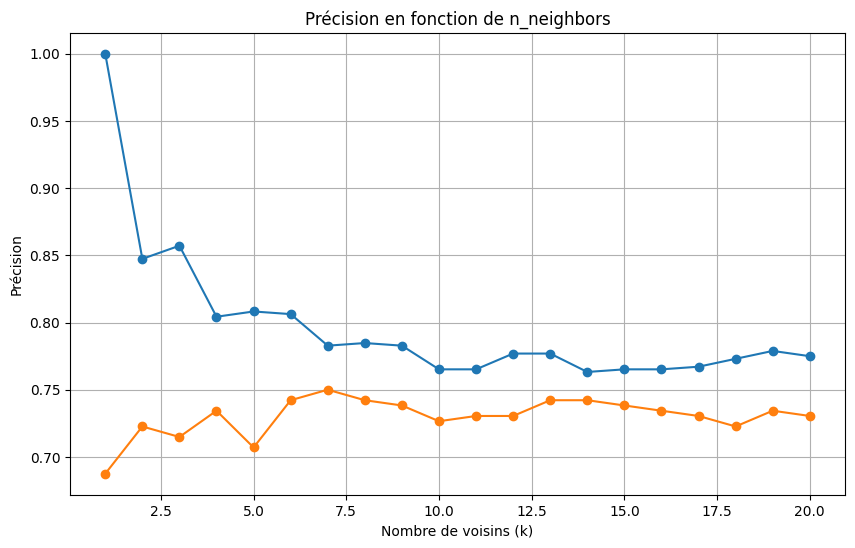

Le meilleur k est : 7 avec une précision de test de 0.75


In [172]:
# Import nécessaire
import matplotlib.pyplot as plt

# Liste pour stocker les scores
train_scores = []
test_scores = []

# Tester n_neighbors dans la plage [1, 20]
for k in range(1, 21):
    # Créer et entraîner le modèle
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Stocker les scores d'apprentissage et de test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label="Score d'apprentissage", marker='o')
plt.plot(range(1, 21), test_scores, label="Score de test", marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.title("Précision en fonction de n_neighbors")
plt.grid()
plt.show()

# Identifier la meilleure valeur de k
best_k = test_scores.index(max(test_scores)) + 1
print(f"Le meilleur k est : {best_k} avec une précision de test de {max(test_scores):.2f}")

In [173]:
# Import nécessaire
import matplotlib.pyplot as plt

k = 1 : Précision = 0.6875
k = 2 : Précision = 0.7227
k = 3 : Précision = 0.7148
k = 4 : Précision = 0.7344
k = 5 : Précision = 0.7070
k = 6 : Précision = 0.7422
k = 7 : Précision = 0.7500
k = 8 : Précision = 0.7422
k = 9 : Précision = 0.7383
k = 10 : Précision = 0.7266
k = 11 : Précision = 0.7305
k = 12 : Précision = 0.7305
k = 13 : Précision = 0.7422
k = 14 : Précision = 0.7422
k = 15 : Précision = 0.7383
k = 16 : Précision = 0.7344
k = 17 : Précision = 0.7305
k = 18 : Précision = 0.7227
k = 19 : Précision = 0.7344
k = 20 : Précision = 0.7305


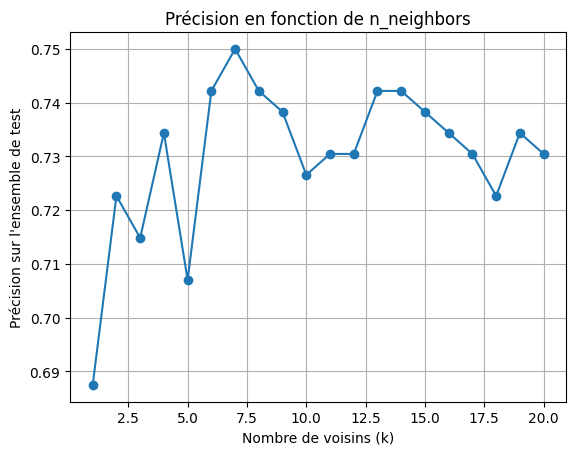

Le meilleur k est : 7 avec une précision de test de 0.75


In [174]:
# Initialiser les scores
scores = []

# Tester n_neighbors dans la plage [1, 20]
for k in range(1, 21):
    # Créer et entraîner le modèle
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Stocker les scores de test
    score = knn.score(X_test, y_test)
    scores.append((k, score))  # Stocker k et son score

# Afficher tous les scores
for k, score in scores:
    print(f"k = {k} : Précision = {score:.4f}")

# Tracer les résultats
plt.plot([k for k, _ in scores], [score for _, score in scores], marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision sur l'ensemble de test")
plt.title("Précision en fonction de n_neighbors")
plt.grid()
plt.show()

# Afficher le meilleur k
best_k, best_score = max(scores, key=lambda x: x[1])
print(f"Le meilleur k est : {best_k} avec une précision de test de {best_score:.2f}")

# 2 KNN pour la régression

### Tâche 6 :
###### De la même manière que dans la première partie du TP, analysez et préparez les données.

In [194]:
# Chargement et analyse des données

# Charger la base de données "housing"
housing_data = pd.read_csv("housing.csv")

In [195]:
# Afficher les premières lignes pour avoir un aperçu des données
print(housing_data.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [196]:
# Analyser la structure des données
print("Dimensions du DataFrame :", housing_data.shape)

Dimensions du DataFrame : (5000, 7)


In [197]:
# Obtenir un résumé rapide sur les données
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [198]:
# Statistiques descriptives pour avoir une idée des valeurs numériques
print(housing_data.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [199]:
# Distribution des classes
print(housing_data['Price'].value_counts())

Price
1.059034e+06    1
1.521141e+06    1
1.148372e+06    1
2.065710e+06    1
1.749820e+06    1
               ..
1.444701e+06    1
7.884278e+05    1
8.759045e+05    1
9.844212e+05    1
1.298950e+06    1
Name: count, Length: 5000, dtype: int64


In [200]:
# Préparation des données

# Sélection des variables prédictives (X) et de la variable cible (y)
X = housing_data.drop('Price', axis=1)  # Variables prédictives
y = housing_data['Price']  # Variable cible

In [201]:
# Supprimer la colonne 'Address' qui est de type string
X = X.drop('Address', axis=1)

In [202]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [203]:
from sklearn.preprocessing import StandardScaler

In [185]:
# Normalisation des données (moyenne = 0, écart-type = 1)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [204]:
# Vérifier la séparation des ensembles
print("Dimensions de X_train et X_test :", X_train.shape, X_test.shape)
print("Exemple de données normalisées (X_train) :", X_train[:5])

Dimensions de X_train et X_test : (3333, 5) (1667, 5)
Exemple de données normalisées (X_train) :       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
898        78864.05341             6.378902                   7.348650   
3999       68267.50282             5.907275                   6.800001   
3615       81489.82375             4.999817                   7.127393   
1402       76801.49678             6.264613                   7.343436   
3873       52034.91153             6.955354                   6.836093   

      Avg. Area Number of Bedrooms  Area Population  
898                           3.30      50194.10811  
3999                          4.10      35935.49687  
3615                          5.48      10504.32739  
1402                          5.44      48481.66451  
3873                          2.20      20444.78627  


### Tâche 7 :
###### Réalisez l’apprentissage de votre modèle et identifiez une valeur du paramètre n_neighbors proposant une bonne généralisation.

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

#### Métrique R_Square/R²

In [206]:
# Liste pour stocker les résultats des différentes valeurs de k
k_values = range(1, 21)
r2_scores = []

# Tester différents k (nombre de voisins)
for k in k_values:
    # Créer le modèle KNN avec k voisins
    knn = KNeighborsRegressor(n_neighbors=k)
    # Entraîner le modèle
    knn.fit(X_train, y_train)
    # Prédictions
    y_pred = knn.predict(X_test)
    # Calculer le coefficient de détermination R²
    r2 = r2_score(y_test, y_pred)
    # Ajouter le score dans la liste
    r2_scores.append(r2)
    # Afficher le score R² pour chaque k
    print(f"k={k} -> R² = {r2:.5f}")

k=1 -> R² = 0.14752
k=2 -> R² = 0.35520
k=3 -> R² = 0.42145
k=4 -> R² = 0.46484
k=5 -> R² = 0.47943
k=6 -> R² = 0.49046
k=7 -> R² = 0.50031
k=8 -> R² = 0.50673
k=9 -> R² = 0.51114
k=10 -> R² = 0.51620
k=11 -> R² = 0.52462
k=12 -> R² = 0.52773
k=13 -> R² = 0.53177
k=14 -> R² = 0.53643
k=15 -> R² = 0.53966
k=16 -> R² = 0.54356
k=17 -> R² = 0.54380
k=18 -> R² = 0.54193
k=19 -> R² = 0.54103
k=20 -> R² = 0.54060


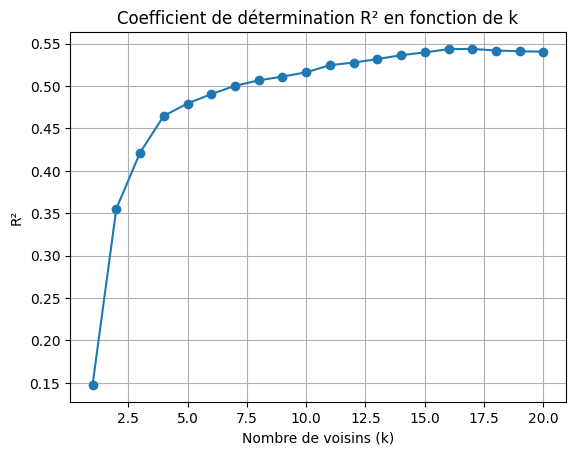

Meilleur k pour R² : 17 avec un score de 0.5438


In [207]:
# Affichage des résultats
plt.plot(k_values, r2_scores, marker='o', label='R²')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('R²')
plt.title('Coefficient de détermination R² en fonction de k')
plt.grid(True)
plt.show()

# Afficher le meilleur k pour R²
best_k_r2 = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f"Meilleur k pour R² : {best_k_r2} avec un score de {best_r2:.4f}")

#### Métrique : R²/MAE/RMSE
###### R² : Coefficient de détermination
###### MAE: Erreur moyenne absolue
###### RMSE : Erreur quadratique moyenne

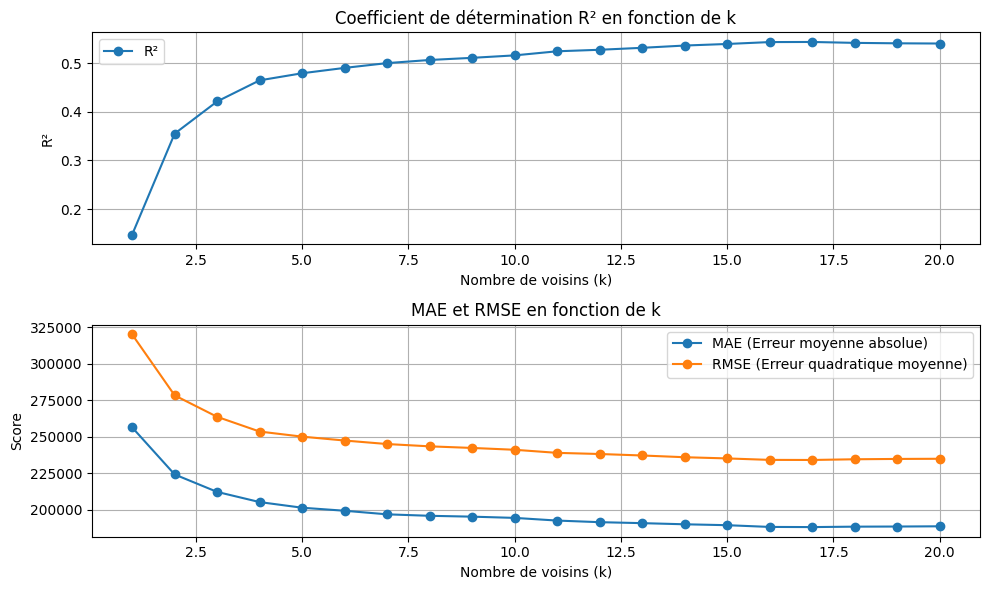

Meilleur k pour R² : 17 avec un score de 0.5438
Meilleur k pour MAE : 17 avec un score de 188211.8880
Meilleur k pour RMSE : 17 avec un score de 234170.2676


In [208]:
# Liste pour stocker les résultats des différentes valeurs de k
k_values = range(1, 21)
r2_scores = []
mae_scores = []
rmse_scores = []

# Tester différents k (nombre de voisins)
for k in k_values:
    # Créer le modèle KNN avec k voisins
    model = KNeighborsRegressor(n_neighbors=k)
    # Entraîner le modèle
    model.fit(X_train, y_train)
    # Prédictions
    y_pred = model.predict(X_test)
    # Calculer les différentes métriques
    r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R²
    mae = mean_absolute_error(y_test, y_pred)  # Erreur moyenne absolue
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Erreur quadratique moyenne (RMSE)
    # Ajouter les scores dans les listes
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Affichage des résultats
plt.figure(figsize=(10, 6))

# Graphique pour R²
plt.subplot(2, 1, 1)
plt.plot(k_values, r2_scores, marker='o', label='R²')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('R²')
plt.title('Coefficient de détermination R² en fonction de k')
plt.grid(True)
plt.legend()

# Graphique pour MAE et RMSE
plt.subplot(2, 1, 2)
plt.plot(k_values, mae_scores, marker='o', label='MAE (Erreur moyenne absolue)')
plt.plot(k_values, rmse_scores, marker='o', label='RMSE (Erreur quadratique moyenne)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.title('MAE et RMSE en fonction de k')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Afficher le meilleur k pour chaque métrique
best_k_r2 = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

best_k_mae = k_values[np.argmin(mae_scores)]
best_mae = min(mae_scores)

best_k_rmse = k_values[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)

print(f"Meilleur k pour R² : {best_k_r2} avec un score de {best_r2:.4f}")
print(f"Meilleur k pour MAE : {best_k_mae} avec un score de {best_mae:.4f}")
print(f"Meilleur k pour RMSE : {best_k_rmse} avec un score de {best_rmse:.4f}")


### Tâche 8:
###### Normalisation des données avec StandardScaler et vérification des performances

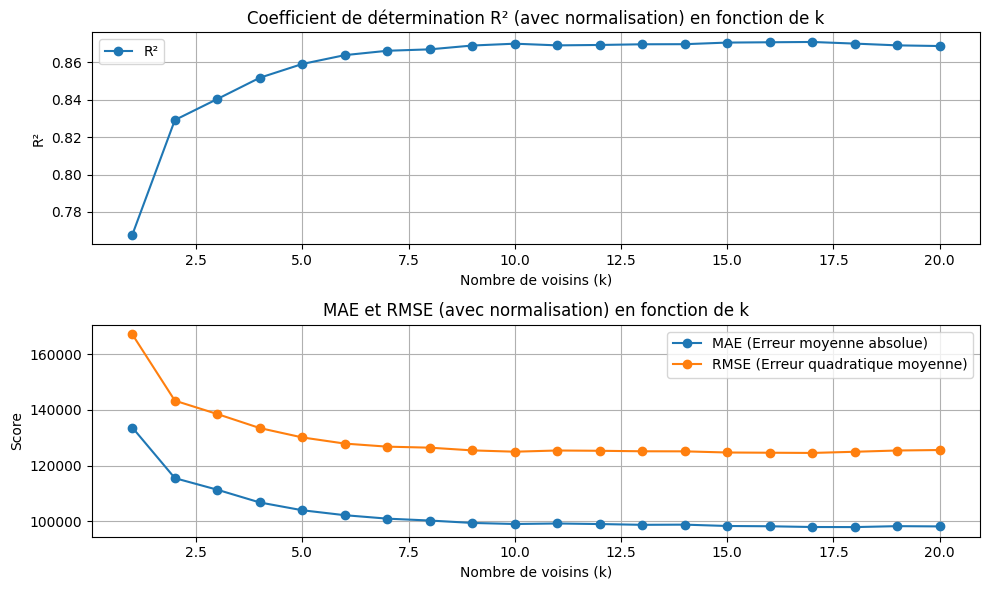

Meilleur k pour R² (avec normalisation) : 17 avec un score de 0.8710
Meilleur k pour MAE (avec normalisation) : 18 avec un score de 97932.0490
Meilleur k pour RMSE (avec normalisation) : 17 avec un score de 124538.6608


In [209]:
# Normalisation des données (moyenne = 0, écart-type = 1)
from sklearn.preprocessing import StandardScaler

# Appliquer le StandardScaler aux données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Liste pour stocker les résultats des différentes valeurs de k avec normalisation
r2_scores_scaled = []
mae_scores_scaled = []
rmse_scores_scaled = []

# Tester différents k (nombre de voisins) avec les données normalisées
for k in k_values:
    # Créer le modèle KNN avec k voisins
    model = KNeighborsRegressor(n_neighbors=k)

    # Entraîner le modèle avec les données normalisées
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred_scaled = model.predict(X_test_scaled)

    # Calculer les différentes métriques
    r2_scaled = r2_score(y_test, y_pred_scaled)  # Coefficient de détermination R²
    mae_scaled = mean_absolute_error(y_test, y_pred_scaled)  # Erreur moyenne absolue
    rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))  # Erreur quadratique moyenne (RMSE)

    # Ajouter les scores dans les listes
    r2_scores_scaled.append(r2_scaled)
    mae_scores_scaled.append(mae_scaled)
    rmse_scores_scaled.append(rmse_scaled)

# Affichage des résultats pour les données normalisées
plt.figure(figsize=(10, 6))

# Graphique pour R² avec normalisation
plt.subplot(2, 1, 1)
plt.plot(k_values, r2_scores_scaled, marker='o', label='R²')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('R²')
plt.title('Coefficient de détermination R² (avec normalisation) en fonction de k')
plt.grid(True)
plt.legend()

# Graphique pour MAE et RMSE avec normalisation
plt.subplot(2, 1, 2)
plt.plot(k_values, mae_scores_scaled, marker='o', label='MAE (Erreur moyenne absolue)')
plt.plot(k_values, rmse_scores_scaled, marker='o', label='RMSE (Erreur quadratique moyenne)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.title('MAE et RMSE (avec normalisation) en fonction de k')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Afficher le meilleur k pour chaque métrique après normalisation
best_k_r2_scaled = k_values[np.argmax(r2_scores_scaled)]
best_r2_scaled = max(r2_scores_scaled)

best_k_mae_scaled = k_values[np.argmin(mae_scores_scaled)]
best_mae_scaled = min(mae_scores_scaled)

best_k_rmse_scaled = k_values[np.argmin(rmse_scores_scaled)]
best_rmse_scaled = min(rmse_scores_scaled)

print(f"Meilleur k pour R² (avec normalisation) : {best_k_r2_scaled} avec un score de {best_r2_scaled:.4f}")
print(f"Meilleur k pour MAE (avec normalisation) : {best_k_mae_scaled} avec un score de {best_mae_scaled:.4f}")
print(f"Meilleur k pour RMSE (avec normalisation) : {best_k_rmse_scaled} avec un score de {best_rmse_scaled:.4f}")


  ***Après normalisation, le modèle devient beaucoup plus précis : le score R2R2 passe de 0.54 à 0.87, et les erreurs (MAE, RMSE) diminuent significativement. Cela montre que la normalisation, en mettant toutes les caractéristiques à la même échelle, améliore l'équilibre et la performance du modèle. Le kk optimal reste stable, mais les prédictions sont nettement meilleures.***


## Autre code juste pour confirmation *Avec R²*


### Tâche 7 : Apprentissage sans normalisation

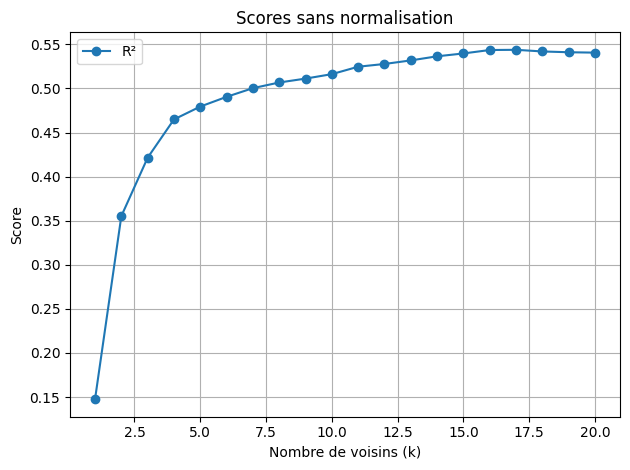

Meilleur k pour R² : 17 avec un score de 0.5438


In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Charger la base de données "housing"
housing_data = pd.read_csv("housing.csv")

# Sélectionner les variables prédictives (X) et la variable cible (y)
X = housing_data.drop(['Price', 'Address'], axis=1)  # Variables prédictives
y = housing_data['Price']  # Variable cible

# Séparer les données en ensembles d'entraînement et de test (80% apprentissage, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Tester différents k (nombre de voisins)
k_values = range(1, 21)
r2_scores, mae_scores, rmse_scores = [], [], []

for k in k_values:
    # Créer le modèle KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Calcul des métriques
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Affichage des résultats R²
plt.plot(k_values, r2_scores, marker='o', label="R²")
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.title('Scores sans normalisation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Meilleurs scores
best_k_r2 = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)
print(f"Meilleur k pour R² : {best_k_r2} avec un score de {best_r2:.4f}")


### Tâche 8 : Apprentissage avec normalisation

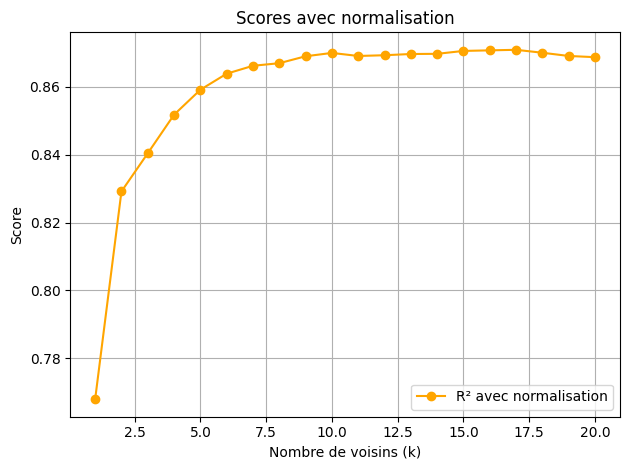

Meilleur k pour R² (avec normalisation) : 17 avec un score de 0.8710


In [213]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Réinitialiser les listes de scores
r2_scores_norm, mae_scores_norm, rmse_scores_norm = [], [], []

for k in k_values:
    # Créer le modèle KNN
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred_scaled = model.predict(X_test_scaled)

    # Calcul des métriques
    r2_scores_norm.append(r2_score(y_test, y_pred_scaled))
    mae_scores_norm.append(mean_absolute_error(y_test, y_pred_scaled))
    rmse_scores_norm.append(np.sqrt(mean_squared_error(y_test, y_pred_scaled)))

# Affichage des résultats R² avec normalisation
plt.plot(k_values, r2_scores_norm, marker='o', label="R² avec normalisation", color="orange")
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.title('Scores avec normalisation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Meilleurs scores après normalisation
best_k_r2_norm = k_values[np.argmax(r2_scores_norm)]
best_r2_norm = max(r2_scores_norm)
print(f"Meilleur k pour R² (avec normalisation) : {best_k_r2_norm} avec un score de {best_r2_norm:.4f}")
